In [1]:
import os
import sys
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from Functions_23_Avino_Lombardi import *
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "Question 2"))
sys.path.append(base_dir)
from Functions_22_Avino_Lombardi import (
    gaussian_kernel,
    polynomial_kernel,
    compute_accuracy,
    compute_confusion_matrix,
)


X_train = joblib.load("../dataset/preprocessed_data/X_train.pkl")
X_test = joblib.load("../dataset/preprocessed_data/X_test.pkl")
y_train = joblib.load("../dataset/preprocessed_data/y_train.pkl")
y_test = joblib.load("../dataset/preprocessed_data/y_test.pkl")

[Early Stopping] Iteration 102, no violating pair found that allows progress.

FINAL REPORT GAUSSIAN KERNEL


,KERNEL,C,gamma,TRAIN ACCURACY,TEST ACCURACY,NUMBER OF ITERATIONS,CPU TIME (s),INITIAL DUAL OBJ VALUE,FINAL DUAL OBJ VALUE
0,gaussian_kernel,1,0.1,0.92,0.91,102,0.0765,0.0,-134.3861


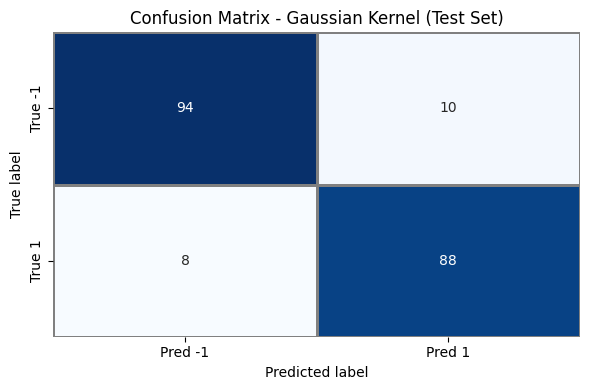

In [2]:
# NEW RUN WITH UPDATED MVP
C = 1
gamma = 0.1
tol = 1e-3
max_iter = 1000

gaussian_model = MVP(C=C,
                     kernel_func=gaussian_kernel,
                     kernel_params={'gamma': gamma},
                     tol=tol,
                     max_iter=max_iter)

gaussian_model.fit(X_train, y_train)

# === STEP 2: PREDICTION ===
gaussian_y_train_pred = gaussian_model.predict(X_train)
gaussian_y_test_pred = gaussian_model.predict(X_test)

# === STEP 3: ACCURACY ===
gaussian_train_acc = compute_accuracy(y_train, gaussian_y_train_pred)
gaussian_test_acc = compute_accuracy(y_test, gaussian_y_test_pred)

# === STEP 4: REPORT ===
gaussian_df_report = pd.DataFrame([{
    "KERNEL": "gaussian_kernel",
    "C": C,
    "gamma": gamma,
    "TRAIN ACCURACY": round(gaussian_train_acc, 4),
    "TEST ACCURACY": round(gaussian_test_acc, 4),
    "NUMBER OF ITERATIONS": gaussian_model.n_iter_,
    "CPU TIME (s)": round(gaussian_model.last_cpu_time, 4),
    "INITIAL DUAL OBJ VALUE": round(gaussian_model.initial_dual_obj, 4),
    "FINAL DUAL OBJ VALUE": round(gaussian_model.dual_objective(), 4)
}])

print("\nFINAL REPORT GAUSSIAN KERNEL")
display(gaussian_df_report)

# === STEP 5: CONFUSION MATRIX ===
gaussian_conf_matrix = compute_confusion_matrix(y_test, gaussian_y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(gaussian_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            linewidths=1, linecolor='gray')
plt.title("Confusion Matrix - Gaussian Kernel (Test Set)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()